In [48]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")

In [8]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [9]:
df_train.head()

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq,binary_target
0,0,Уран,>24LY,14.617797,1.0,27034.974914,71.37,1.000000,NaN,26.0,10.0,NaN,NaN,NaN,False,0.540984,_output-_сеть 500 (условие) 2000f;5d,1.000000,0
1,1,Марс,>24LY,32.686083,3.0,40373.828300,354.27,2.000000,35.679126,45.0,8.0,NaN,NaN,NaN,False,0.573770,тариф_a 250 (условие) _безлим_c_output_сутки,1.414214,0
2,2,Церера,>24LY,25.318570,3.0,32004.378374,139.74,1.414214,NaN,NaN,13.0,NaN,NaN,NaN,False,0.131148,NaN,NaN,0
3,3,Марс,>24LY,70.710678,38.0,59953.505011,1722.65,6.403124,163.309522,203.0,274.0,NaN,NaN,0.031817,False,0.885246,"трафик: 100 (условие) 40mb,_сутки",4.000000,0
4,4,Меркурий,>24LY,9.244999,2.0,21499.998428,28.63,1.414214,5.000000,NaN,NaN,NaN,NaN,NaN,False,0.344262,"трафик: 100 (условие) 40mb,_сутки",1.000000,0


## EDA

In [121]:
num_cols = [
    'сумма',
    # 'частота_пополнения',
    # 'доход',
    # 'сегмент_arpu',
    # 'частота',
    'объем_данных',
    'on_net',
    'продукт_1',
    'продукт_2',
    'зона_1',
    'зона_2',
    'секретный_скор',
    'pack_freq'
]

cat_cols = [
    'регион',
    'использование',
    # 'pack'

]

feature_cols = num_cols + cat_cols
target_col = 'binary_target'

In [122]:
len(feature_cols)

11

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010248 entries, 0 to 1010247
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   client_id           1010248 non-null  int64  
 1   регион              1010248 non-null  int64  
 2   использование       1010248 non-null  int64  
 3   сумма               655354 non-null   float64
 4   частота_пополнения  655354 non-null   float64
 5   доход               669787 non-null   float64
 6   сегмент_arpu        669787 non-null   float64
 7   частота             669787 non-null   float64
 8   объем_данных        512886 non-null   float64
 9   on_net              641315 non-null   float64
 10  продукт_1           590287 non-null   float64
 11  продукт_2           405005 non-null   float64
 12  зона_1              79807 non-null    float64
 13  зона_2              64000 non-null    float64
 14  mrg_                1010248 non-null  bool   
 15  секретный_скор 

In [124]:
df_train.shape[0]

1010248

In [125]:
df_train.isna().sum()/df_train.shape[0]*100

client_id              0.000000
регион                 0.000000
использование          0.000000
сумма                 35.129394
частота_пополнения    35.129394
доход                 33.700735
сегмент_arpu          33.700735
частота               33.700735
объем_данных          49.231674
on_net                36.519053
продукт_1             41.570090
продукт_2             59.910339
зона_1                92.100257
зона_2                93.664922
mrg_                   0.000000
секретный_скор         0.000000
pack                  41.898128
pack_freq             41.898128
binary_target          0.000000
dtype: float64

Можно заметить что признаки зона_1 и зона_2 имеют больше 90% пропущенных значений. Удалим этот столбец.

In [126]:
df_train['использование'].nunique()

2

Text(0.5, 1.0, 'столбец использование')

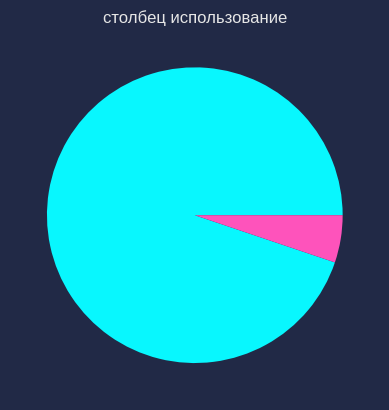

In [127]:
pie_vals_dependents = list(zip(df_train['использование'].value_counts().index, round(df_train['использование'].value_counts(normalize=True) * 100, 2).values))


plt.pie(
    df_train['использование'].value_counts(), 
    # labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
plt.title('столбец использование')

In [128]:
df_train['использование'] = df_train['использование'].apply(lambda x: 1 if x == '>24LY' else 0)

In [129]:
result = df_train.groupby('регион')[target_col].mean() * 100
result

регион
0    18.732353
1    18.745183
Name: binary_target, dtype: float64

Text(0.5, 1.0, 'столбец использование')

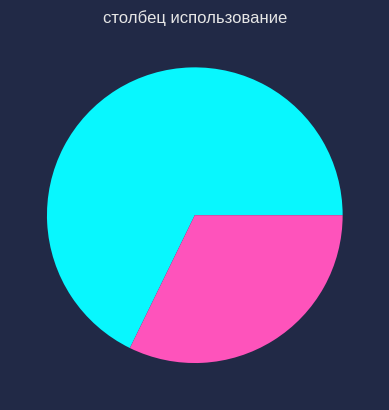

In [130]:
pie_vals_dependents = list(zip(df_train['регион'].value_counts().index, round(df_train['регион'].value_counts(normalize=True) * 100, 2).values))


plt.pie(
    df_train['регион'].value_counts(), 
    # labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
plt.title('столбец использование')

In [131]:
df_train['регион'] = df_train['регион'].apply(lambda x: 1 if x == 'Марс' or x == 'Земля' else 0)


In [132]:
correlation_matrix = df_train[num_cols].corr()

<Axes: >

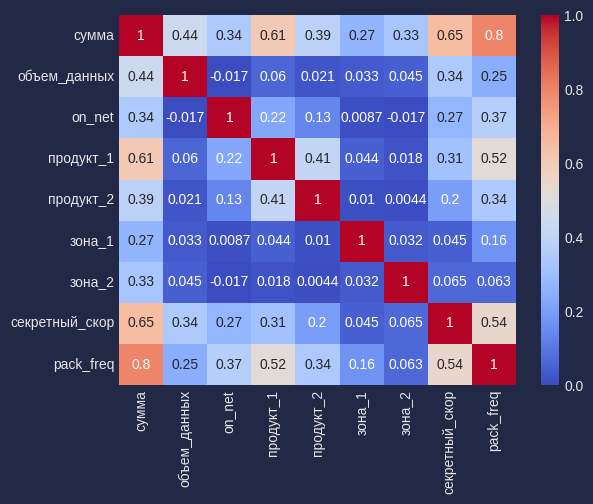

In [133]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)


In [135]:
df_cleaned = df_train

In [136]:
df_cleaned.isna().sum()/df_train.shape[0]*100


client_id              0.000000
регион                 0.000000
использование          0.000000
сумма                 35.129394
частота_пополнения    35.129394
доход                 33.700735
сегмент_arpu          33.700735
частота               33.700735
объем_данных          49.231674
on_net                36.519053
продукт_1             41.570090
продукт_2             59.910339
зона_1                92.100257
зона_2                93.664922
mrg_                   0.000000
секретный_скор         0.000000
pack                  41.898128
pack_freq             41.898128
binary_target          0.000000
dtype: float64

<Axes: >

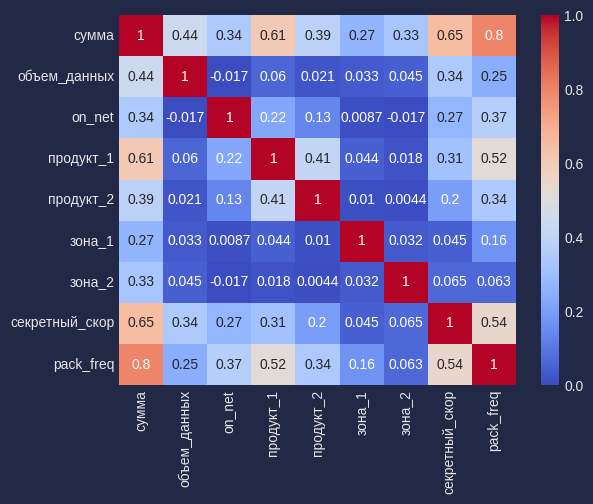

In [137]:
correlation_matrix = df_cleaned[num_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)


In [138]:
X = df_cleaned[feature_cols]
y = df_cleaned[target_col]

## CatBoost

In [139]:
from catboost import CatBoostClassifier

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [145]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000
)

PARAMS = {
    'l2_leaf_reg': [3], # [3, 5, 7, 10],
    # "subsample": [0.3], # np.arange(0.1, 1, 0.05),
    # "min_data_in_leaf": [100], #np.arange(10, 1001, 10),
    "n_estimators": [250, 500], #[5, 10, 50, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05, 0.03], #[0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [3, 5], #np.arange(4, 20, 1),
}
catboost.grid_search(PARAMS, X, y, cv=5, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.9030384	best: 0.9030384 (0)	total: 22.4s	remaining: 2m 37s
1:	loss: 0.9027627	best: 0.9030384 (0)	total: 44s	remaining: 2m 12s
2:	loss: 0.9034196	best: 0.9034196 (2)	total: 1m 27s	remaining: 2m 25s
3:	loss: 0.9031753	best: 0.9034196 (2)	total: 2m 10s	remaining: 2m 10s
4:	loss: 0.9035011	best: 0.9035011 (4)	total: 2m 44s	remaining: 1m 38s
5:	loss: 0.9033390	best: 0.9035011 (4)	total: 3m 19s	remaining: 1m 6s
6:	loss: 0.9036807	best: 0.9036807 (6)	total: 4m 29s	remaining: 38.6s
7:	loss: 0.9036515	best: 0.9036807 (6)	total: 5m 41s	remaining: 0us
Estimating final quality...


{'params': {'depth': 5,
  'learning_rate': 0.05,
  'l2_leaf_reg': 3,
  'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0, 499],
              'test-AUC-mean': [0.8926591782721802, 0.9025005877853867],
              'test-AUC-std': [0.001363240248320716, 0.0011727445826604213],
              'train-AUC-mean': [0.8927527190795971, 0.9040556577409158],
              'train-AUC-std': [0.001533622501088289, 0.0002937237069828892],
              'test-Logloss-mean': [0.635285592279239, 0.2939386208889977],
              'test-Logloss-std': [0.0011865834268050502,
               0.0014884417124729002],
              'train-Logloss-mean': [0.6352707317088099, 0.2919341807390898],
              'train-Logloss-std': [0.0012219179101111083,
               0.00037411286191453157]})}

In [146]:
f1_score(catboost.predict(X), y)


0.6071727699967429

In [147]:
def find_optimal_threshold(y_true, y_pred_proba):
    thresholds = np.linspace(0, 1, 100)  # Генерируем 100 равномерно распределенных порогов от 0 до 1
    best_threshold = None
    best_f1 = -1

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)  # Преобразуем вероятности в бинарные предсказания по порогу
        f1 = f1_score(y_true, y_pred)  # Вычисляем F1-меру для текущего порога

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1



In [148]:
# Пример использования:
# y_true - истинные метки классов
# y_pred_proba - вероятности принадлежности к классу 1

optimal_threshold, max_f1 = find_optimal_threshold(y, catboost.predict_proba(X)[:, 1])
print("Оптимальный порог:", optimal_threshold)
print("Максимальное значение F1-меры:", max_f1)

Оптимальный порог: 0.32323232323232326
Максимальное значение F1-меры: 0.6535878758967396


In [149]:
df_test['использование'] = df_test['использование'].apply(lambda x: 1 if x == '>24LY' else 0)


In [150]:
df_test['регион'] = df_test['регион'].apply(lambda x: 1 if x == 'Марс' or x == 'Земля' else 0)


In [151]:
df_test

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq
0,1010248,0,1,9.244999,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.081967,NaN,NaN
1,1010249,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.262295,NaN,NaN
2,1010250,1,1,18.489997,3.0,30424.692691,114.10,1.732051,1.000000,22.0,13.0,NaN,0.000835,NaN,False,0.934426,_output-_сеть 500 (условие) 2000f;5d,1.000000
3,1010251,0,1,39.223207,7.0,44284.990356,512.82,2.645751,7.615773,130.0,123.0,5.0,NaN,NaN,False,0.508197,_output-_сеть 500 (условие) 2000f;5d,2.236068
4,1010252,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.163934,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497581,1507829,1,1,54.694150,14.0,52294.430677,997.01,3.741657,NaN,147.0,207.0,36.0,NaN,NaN,False,1.000000,тариф_a:500 (условие) 2500f input__ _сеть _250...,3.741657
497582,1507830,1,1,9.244999,1.0,14723.954424,6.41,1.414214,NaN,266.0,24.0,NaN,NaN,NaN,False,0.721311,NaN,NaN
497583,1507831,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.016393,NaN,NaN
497584,1507832,1,1,28.867456,5.0,37991.746291,277.78,2.236068,0.000000,23.0,30.0,NaN,NaN,NaN,False,0.459016,_output-_сеть 500f =2000f__output_сеть__безлим,1.414214


In [152]:
X_test = df_test[feature_cols]


In [155]:
submission = pd.read_csv('./data/sample_submission.csv')
submission["preds"] = catboost.predict_proba(X_test)[:,1]
submission["preds"] = submission["preds"].apply(lambda x: 1 if x > optimal_threshold else 0)
submission.to_csv("Submissions/catboost_with_some_DataPreparation.csv", index=False)

In [36]:
! kaggle competitions submit -c teta-mts-ml-1 -f Submissions/catboost_without_DataPreparation.csv -m "Catboost prediction without any preparation"

Traceback (most recent call last):
  File "/home/constantfear/Projects/venvs/.main-venv/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/constantfear/Projects/venvs/.main-venv/lib/python3.11/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/constantfear/Projects/venvs/.main-venv/lib/python3.11/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/constantfear/.kaggle. Or use the environment method.
